In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
df3 = spark.sql('select * from ds12_potenciales_contribuyentes.md_matriz_PCA')
df3.head()

Row(nro_doc='00001047', nro_columnas=1, edad=Decimal('53'), itf_ingreso=0.0, itf_egresos=0.0, itf_transacciones=0, pre_predios=0, pre_mto_autov=0.0, cpe_comprobantes_electronico=2, cpe_mto_total_venta_real=0.0, cpe_mto_total_igv_real=0.0, cpe_mto_total_venta_otroscpe=0.0, rcc_prom_normal_6m=0.0, rcc_num_entrep_dic2018=0, rosf_ord_ben=0, rosf_ord_eje=0, rosf_ben_eje=0, rosf_ben_ord=0, rosf_eje_ord=0, rosf_eje_ben=0, mig_salida_peru=0, mig_entrada_pais=0, mig_registos=0, mig_porc_salidas_americas=0.0, mig_diferencia_dias=0, mig_prom_dias_viaje=0.0, features_vector=SparseVector(25, {0: 1.0, 1: 53.0, 7: 2.0}), features=DenseVector([-0.7858, 0.7057, -0.0032, -0.0042, -0.554, -0.1738, -0.0262, -0.007, -0.0092, -0.0078, -0.0056, -0.669, -0.794, -0.0913, -0.1011, -0.0953, -0.0913, -0.0657, -0.0652, -0.0485, -0.0471, -0.0478, -0.2878, -0.1782, -0.1647]), prediction=0, pcaFeatures=DenseVector([0.4563, 0.1204, -1.1846, 0.1781, -0.657, -0.0106]))

In [3]:
dfpandas = df3.toPandas()

In [4]:
dfpandas.columns

Index(['nro_doc', 'nro_columnas', 'edad', 'itf_ingreso', 'itf_egresos',
       'itf_transacciones', 'pre_predios', 'pre_mto_autov',
       'cpe_comprobantes_electronico', 'cpe_mto_total_venta_real',
       'cpe_mto_total_igv_real', 'cpe_mto_total_venta_otroscpe',
       'rcc_prom_normal_6m', 'rcc_num_entrep_dic2018', 'rosf_ord_ben',
       'rosf_ord_eje', 'rosf_ben_eje', 'rosf_ben_ord', 'rosf_eje_ord',
       'rosf_eje_ben', 'mig_salida_peru', 'mig_entrada_pais', 'mig_registos',
       'mig_porc_salidas_americas', 'mig_diferencia_dias',
       'mig_prom_dias_viaje', 'features_vector', 'features', 'prediction',
       'pcaFeatures'],
      dtype='object')

In [5]:
comp1 = []
comp2 = []
comp3 = []
comp4 = []
for i in range(len(dfpandas)):
    comp1.append(dfpandas.pcaFeatures[i][0])
    comp2.append(dfpandas.pcaFeatures[i][1])
    comp3.append(dfpandas.pcaFeatures[i][2])
    comp4.append(dfpandas.pcaFeatures[i][3])

In [6]:
dfcomp = pd.DataFrame({
    'comp1':comp1,
    'comp2':comp2,
    'comp3':comp3,
    'comp4':comp4
})

In [7]:
dfpandas['dim1'] = dfcomp['comp1']
dfpandas['dim2'] = dfcomp['comp2']
dfpandas['dim3'] = dfcomp['comp3']
dfpandas['dim4'] = dfcomp['comp4']

In [8]:
dfpandas.head()

,nro_doc,nro_columnas,edad,itf_ingreso,itf_egresos,itf_transacciones,pre_predios,pre_mto_autov,cpe_comprobantes_electronico,cpe_mto_total_venta_real,...,mig_diferencia_dias,mig_prom_dias_viaje,features_vector,features,prediction,pcaFeatures,dim1,dim2,dim3,dim4
0,00001047,1,53,0.0,0.0,0,0,0.00,2,0.00,...,0,0.0,"(1.0, 53.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0,...","[-0.7858441243939626, 0.7056812565046655, -0.0...",0,"[0.45630619185129906, 0.1203993468901758, -1.1...",0.456306,0.120399,-1.184566,0.178053
1,00001602,1,99,0.0,0.0,0,0,0.00,1,11.50,...,0,0.0,"(1.0, 99.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 11.5...","[-0.7858441243939626, 3.4780974501181046, -0.0...",0,"[0.39592006638069005, 0.1647493003378672, -1.0...",0.395920,0.164749,-1.070434,0.201693
2,00001707,4,69,0.0,12680.0,21,1,53727.97,2,20.90,...,0,0.0,"(4.0, 69.0, 0.0, 12680.0, 21.0, 1.0, 53727.97,...","[3.2951626747390357, 1.6699999325441226, -0.00...",1,"[-0.8193844387204916, 0.5725143869662476, 3.88...",-0.819384,0.572514,3.881926,-0.202852
3,00002323,1,88,0.0,0.0,0,0,0.00,2,9.83,...,0,0.0,"(1.0, 88.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 9.83...","[-0.7858441243939626, 2.8151283603409776, -0.0...",0,"[0.41024096826796824, 0.15428593729072085, -1....",0.410241,0.154286,-1.097388,0.196115
4,00002481,1,55,0.0,0.0,0,0,0.00,3,1968.00,...,0,0.0,"(1.0, 55.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1968...","[-0.7858441243939626, 0.8262210910095977, -0.0...",0,"[0.45328243768418014, 0.12255153221839753, -1....",0.453282,0.122552,-1.179075,0.179180


Text(0.5,1,'Dim1 vs Dim2')

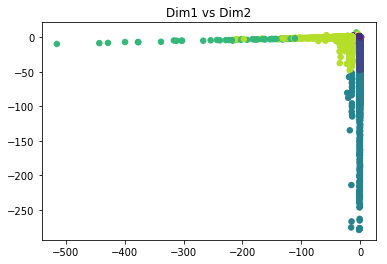

In [9]:
plt.scatter(dfpandas.dim1, dfpandas.dim2,
            c=dfpandas.prediction, s=30)
plt.title('Dim1 vs Dim2')

Text(0.5,1,'Dim1 vs Dim2')

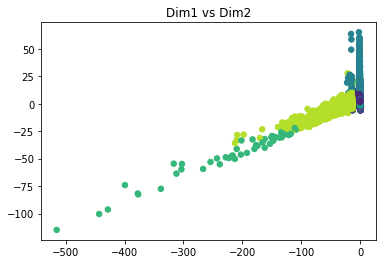

In [10]:
plt.scatter(dfpandas.dim1, dfpandas.dim3,
            c=dfpandas.prediction, s=30)
plt.title('Dim1 vs Dim3')

Text(0.5,1,'Dim1 vs Dim4')

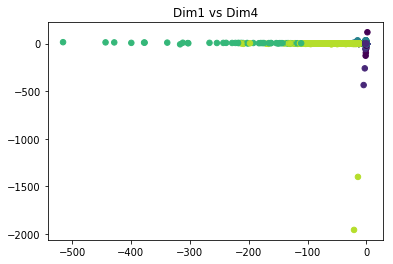

In [11]:
plt.scatter(dfpandas.dim1, dfpandas.dim4,
            c=dfpandas.prediction, s=30)
plt.title('Dim1 vs Dim4')

In [12]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

/data/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [106]:
dfpandas2 = dfpandas[(dfpandas['nro_columnas']>3) & ( (dfpandas['prediction']==1)| (dfpandas['prediction']==2)| (dfpandas['prediction']==5)| (dfpandas['prediction']==8)| (dfpandas['prediction']==9)) ]

In [107]:
dfpandas2.groupby('prediction').count()

,nro_doc,nro_columnas,edad,itf_ingreso,itf_egresos,itf_transacciones,pre_predios,pre_mto_autov,cpe_comprobantes_electronico,cpe_mto_total_venta_real,...,mig_porc_salidas_americas,mig_diferencia_dias,mig_prom_dias_viaje,features_vector,features,pcaFeatures,dim1,dim2,dim3,dim4
prediction,,,,,,,,,,,,,,,,,,,,,
1,17006,17006,17006,17006,17006,17006,17006,17006,17006,17006,...,17006,17006,17006,17006,17006,17006,17006,17006,17006,17006
2,4899,4899,4899,4899,4899,4899,4899,4899,4899,4899,...,4899,4899,4899,4899,4899,4899,4899,4899,4899,4899
8,14285,14285,14285,14285,14285,14285,14285,14285,14285,14285,...,14285,14285,14285,14285,14285,14285,14285,14285,14285,14285
9,5159,5159,5159,5159,5159,5159,5159,5159,5159,5159,...,5159,5159,5159,5159,5159,5159,5159,5159,5159,5159


In [108]:
dfpandas2.dtypes

nro_doc                          object
nro_columnas                      int64
edad                             object
itf_ingreso                     float64
itf_egresos                     float64
itf_transacciones                 int64
pre_predios                       int64
pre_mto_autov                   float64
cpe_comprobantes_electronico      int64
cpe_mto_total_venta_real        float64
cpe_mto_total_igv_real          float64
cpe_mto_total_venta_otroscpe    float64
rcc_prom_normal_6m              float64
rcc_num_entrep_dic2018            int64
rosf_ord_ben                      int64
rosf_ord_eje                      int64
rosf_ben_eje                      int64
rosf_ben_ord                      int64
rosf_eje_ord                      int64
rosf_eje_ben                      int64
mig_salida_peru                   int64
mig_entrada_pais                  int64
mig_registos                      int64
mig_porc_salidas_americas       float64
mig_diferencia_dias               int64


In [110]:
data_clean = dfpandas2.dropna()

In [111]:
predictors = data_clean[['nro_columnas', 'edad', 'itf_ingreso', 'itf_egresos',
       'itf_transacciones', 'pre_predios', 'pre_mto_autov',
       'cpe_comprobantes_electronico', 'cpe_mto_total_venta_real',
       'cpe_mto_total_igv_real', 'cpe_mto_total_venta_otroscpe',
       'rcc_prom_normal_6m', 'rcc_num_entrep_dic2018', 'rosf_ord_ben',
       'rosf_ord_eje', 'rosf_ben_eje', 'rosf_ben_ord', 'rosf_eje_ord',
       'rosf_eje_ben', 'mig_salida_peru', 'mig_entrada_pais', 'mig_registos',
       'mig_porc_salidas_americas', 'mig_diferencia_dias',
       'mig_prom_dias_viaje']]
target = data_clean.prediction

In [112]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.4)

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
classifier=RandomForestClassifier(n_estimators=25)

In [115]:
classifier=classifier.fit(pred_train,tar_train)

In [116]:
predictions=classifier.predict(pred_test)

In [117]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[6721,   32,    0,   73],
       [  17, 1972,    0,    2],
       [   0,    0, 5689,    0],
       [  78,   11,    1, 1944]])

In [118]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.9870616686819831

In [119]:
model = ExtraTreesClassifier()

In [120]:
model.fit(pred_train,tar_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [121]:
print(model.feature_importances_)

[0.00704255 0.02679138 0.00566306 0.0077923  0.03883717 0.0653528
 0.01641004 0.00532871 0.00609911 0.00550781 0.00070616 0.03185892
 0.03154809 0.03859396 0.11597839 0.02967583 0.07722623 0.08586675
 0.10485625 0.0098925  0.01772437 0.01153488 0.08204251 0.13565785
 0.04201237]


In [122]:
list(model.feature_importances_)

[0.007042549490184027,
 0.026791377780028075,
 0.0056630572412174705,
 0.0077923026390045655,
 0.03883717475714743,
 0.0653528031989982,
 0.01641004392308315,
 0.005328709848310975,
 0.006099107292049497,
 0.005507814749430854,
 0.0007061604350119807,
 0.03185891657321845,
 0.031548087602235146,
 0.03859396323362728,
 0.11597838755465902,
 0.029675830112947298,
 0.07722623034644471,
 0.0858667492118059,
 0.10485625487974685,
 0.009892498949861954,
 0.017724374634539592,
 0.01153488270396402,
 0.08204250779025579,
 0.13565784983978832,
 0.04201236521243941]

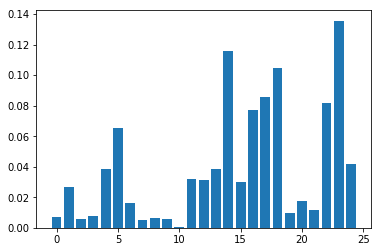

In [123]:
from matplotlib import pyplot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

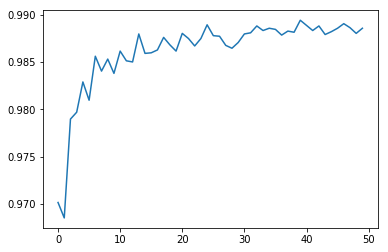

In [125]:
trees=range(50)
accuracy=np.zeros(50)
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx + 1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)
plt.cla()
plt.plot(trees, accuracy)

In [126]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
sns.set(style="white")

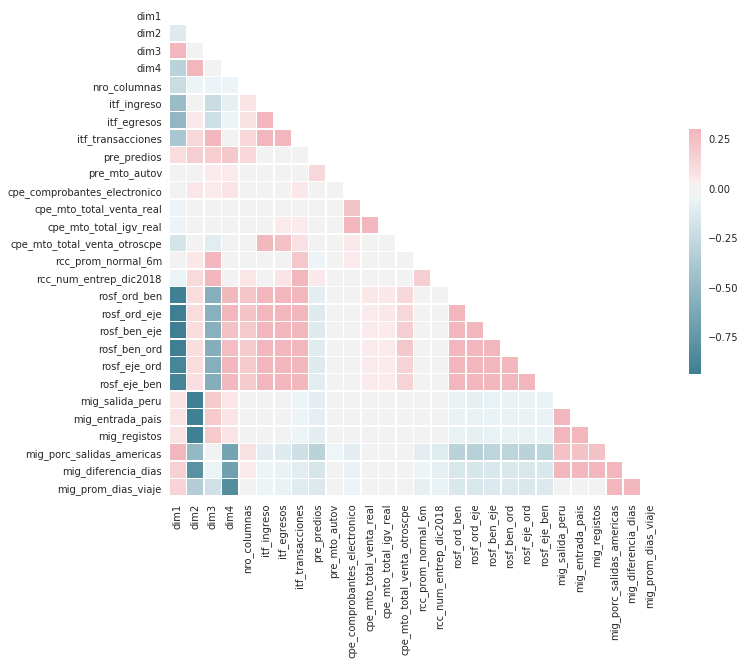

In [130]:
# Generate a large random dataset
rs = np.random.RandomState(33)
d = data_clean[['dim1','dim2','dim3','dim4','nro_columnas', 'edad', 'itf_ingreso', 'itf_egresos',
       'itf_transacciones', 'pre_predios', 'pre_mto_autov',
       'cpe_comprobantes_electronico', 'cpe_mto_total_venta_real',
       'cpe_mto_total_igv_real', 'cpe_mto_total_venta_otroscpe',
       'rcc_prom_normal_6m', 'rcc_num_entrep_dic2018', 'rosf_ord_ben',
       'rosf_ord_eje', 'rosf_ben_eje', 'rosf_ben_ord', 'rosf_eje_ord',
       'rosf_eje_ben', 'mig_salida_peru', 'mig_entrada_pais', 'mig_registos',
       'mig_porc_salidas_americas', 'mig_diferencia_dias',
       'mig_prom_dias_viaje']]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [129]:
d

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,-0.318854,-1.602981,-1.535218,-0.570401,-0.216728,0.254874,-0.149450,2.010783,-0.096784,0.422202,...,-0.951219,0.832973,-1.000208,0.343463,1.546030,0.690081,-2.045853,0.334467,-0.641459,-0.222497
1,-1.230374,0.205848,0.821371,-0.493780,-1.408794,-1.216324,1.734299,-0.206790,-0.733189,0.774163,...,-0.148826,-0.606270,-1.185801,0.455504,-0.837645,-0.146961,-0.682350,1.487670,-1.094711,-1.654707
2,-0.023842,-0.363738,-0.482943,0.739577,0.611252,0.491802,1.792924,-0.683737,1.054113,-0.615562,...,-1.120717,0.991136,1.630796,-1.900090,0.062316,0.479998,0.379609,-1.512245,0.289020,0.095524
3,-0.292821,0.856582,0.933473,-0.421045,1.590430,-1.063801,2.104884,-1.090494,1.484521,-1.089229,...,0.230258,0.195235,0.535839,0.684299,2.821279,0.916504,0.150722,0.017747,0.006885,0.329035
4,-0.587376,1.751572,0.308274,-0.894283,-0.769156,0.869197,0.371381,-0.628362,-0.922477,-0.903391,...,1.519031,0.749896,-2.269087,-0.760599,-0.955502,0.923951,0.315157,1.340910,0.678992,0.594258
5,-1.118902,-0.546686,-0.541049,-1.466870,1.323851,0.344447,-1.934179,0.905662,-0.941123,0.707246,...,0.397142,-0.946225,-0.352427,0.274527,-1.386049,-1.775175,1.683865,-1.934213,-0.978937,0.386391
6,0.346235,-0.449622,-1.355818,1.192042,0.578353,-0.103730,-0.161044,0.894541,1.290747,0.108126,...,0.594309,-0.166302,1.272612,2.076016,0.052485,0.740696,0.606607,1.219077,0.000855,-0.146146
7,-0.261976,0.108848,1.017882,-1.144546,0.781887,-0.173980,-0.341525,-1.879558,-0.993942,1.021854,...,0.439146,0.998467,0.437747,-0.027217,-1.035272,0.486417,0.473810,-0.299381,-0.190314,-0.630710
8,0.196723,0.041640,-0.224855,0.432444,0.608030,0.358296,0.056806,-0.236592,0.877240,0.057214,...,0.422761,0.039107,0.164277,0.745735,0.106707,-1.300606,-0.818656,1.599970,-0.603120,-0.096894
9,-0.256457,-0.264391,0.021789,1.118757,0.086716,-0.394722,0.121662,0.610584,-1.591931,1.693947,...,-0.283728,2.209934,3.736254,0.852186,0.495830,0.380732,0.360668,0.208671,1.323454,-0.382265
